# 회귀(regression)

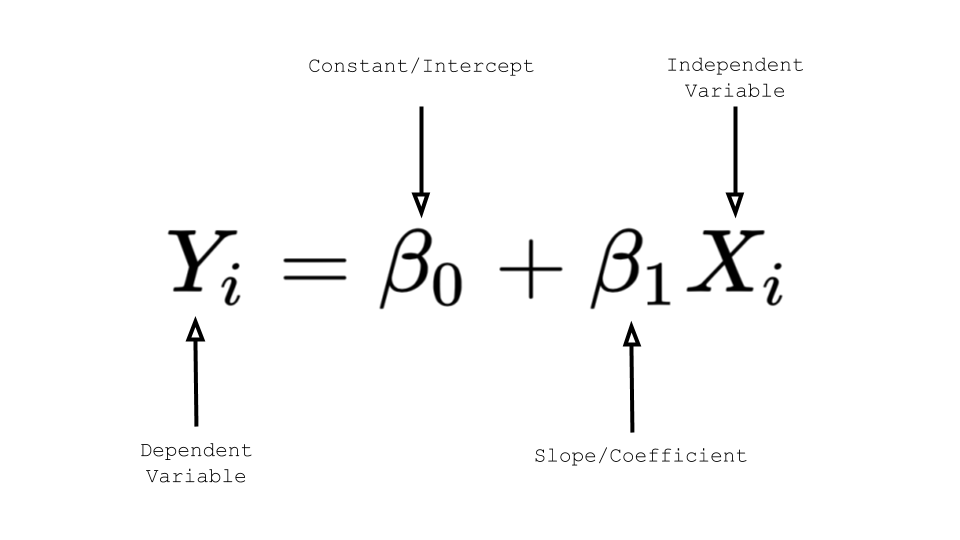


* 머신러닝 회귀 예측의 핵심은 회적의 회귀계수(regression coefficients)를 찾는 것임

* 선형 회귀( = 단일회귀)는 `실제값과 예측값의 차이(오류의 제곱값)를 최소화`하는 직선형 회귀선을 최적화하는 방식으로 규제 방식에 따라 별도의 유형으로 나뉜다. `규제`란 일반적인 선형 회귀의 과적합 문제 해결을 위해 회귀 계수에 패널티 값을 적용하는 것을 말한다.

## 회귀의 종류

|종류|내용|
|------|---|
|일반 선형 회귀|실제값과 예측값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델|
| 릿지 |선형 회귀에 L2 규제를 추가한 회귀로 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델|
|라쏘|선형 회귀에 L1 규제를 추가한 회귀로 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측시 피처가 선택되지 않게 하는 것|
|엘리스틱넷|L2, L1 규제를 함께 결합한 모델|
|로지스틱|분류에 사용되는 선형 모델로 강력한 분류 알고리즘 이진 분류뿐만 아니라 회소 영역 분류에서도 좋은 예측 성능 有|


#### 최적이 회귀모델 = `잔차`(실제값과 예측값의 차이)의 합이 최소가 되는 모델

RSS - 잔차 제곱합 (Residual Sum of Squares)이 최소가 되는 것

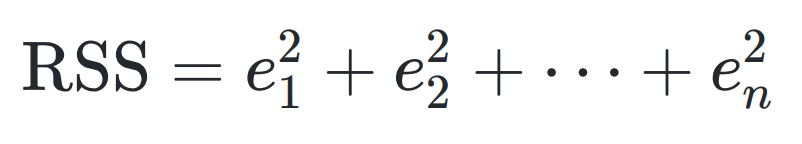

## 오류의 합 계산 방법 = 회귀 성능 평가 지표


|종류|내용|
|------|---|
|MAE(Mean Absolute Error)|잔차에 절댓값 취해서 평균한 것|
|MSE(Mean Squared Error)|잔차를 제곱하여 평균|
|RMSE|MSE가 제곱의 평균이기에 실제보다 값이 커지는 특성이 有 MSE에 루트를 씌운 것|
|R²|분산기반 예측 성능 평가. 실제 분산 대비 예측값의 분산 비율을 지표로 하여 1에 가까울수록 예측 정확도가 높다고 판단|


## 비용 최소화화기

회귀에서 RSS는 비용이되고 회귀계수(가중치)로 구성되는 RSS를 비용함수라고 함.

회귀 알고리즘은 비용함수가 반환하는 오류값을 지속적으로 감소시켜 최소의 오류값을 구하는 것임. 비용함수를 손실함수라고 하기도 함.

이러한 최소 오류값을 반환하는 회귀계수를 구하는 방법. 
#### --------------------------------------------------------------------------------------------------------------------------------------------

# <경사 하강법>

p.312~

점진적으로 실제값과 예상값의 차이인 비용함수의 반환값이 작아지는 방향으로 파라미터 업데이트를 시행. 최소의 오류를 갖는 변수(파라미터)를 찾는 알고리즘.

비용함수가 최소되는 가중치(파라미터)를 구하는 방법으로 파라미터값이 많아질때 RSS를 최소화하는 방법을 직관적으로 제공함

비용함수의 미분값(함수의 기울기)가 더이상 감소하지 않는 지점 = 비용함수가 최소인 지점

* 단점: 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트 - 시간이 오래걸림.

### 확률적 경사 하강법: 전체가 아닌 일부 데이터만 이용하여 w 업데이트.

* 피처가 많아지면 선형대수 dot product를 이용하여 회귀 에측값을 구할 수 있다

### 실제값을 Y=4X+6 시뮬레이션하는 데이터 값 생성

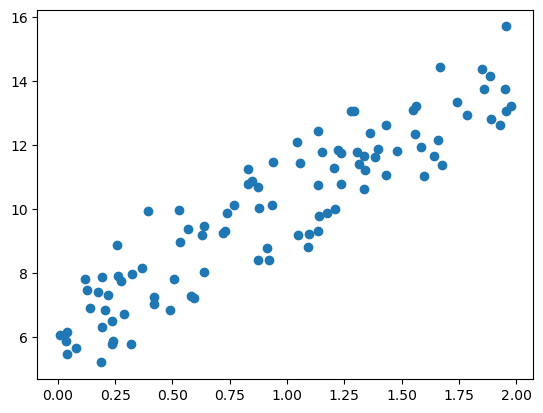

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [2]:
X.shape, y.shape

((100, 1), (100, 1))

### w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성

예측 배열 y_pred는 np.dot(X, w1.T) + w0 임
100개의 데이터 X(1,2,...,100)이 있다면 예측값은 w0 + X(1)w1 + X(2)w1 +..+ X(100)*w1이며, 이는 입력 배열 X와 w1 배열의 내적임.

새로운 w1과 w0를 update함

In [3]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [4]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))   
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

반복적으로 경사 하강법을 이용하여 get_weigth_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성

In [5]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

### 예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행

In [6]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


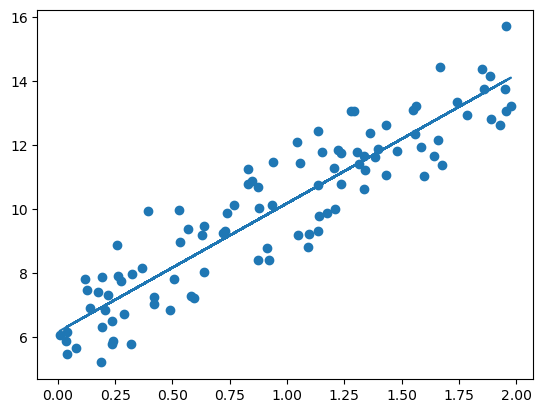

In [7]:
plt.scatter(X, y)
plt.plot(X,y_pred)

### 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출

In [8]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [9]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937
